# Pyber Ride Sharing Analysis

•	The Bubble Plot indicates that number of rides and drivers both are more in urban cities as compared to suburban and rural cities. Although average fare is more for suburban and rural cities for few instances.

•	All three pie charts show that urban cities have a good percentage of total fare, total rides and total drivers.

•	From this analysis, this can be predicted that there are many new opportunities to expand the business in suburban and rural cities, in terms of hiring more drivers to operate in these cities.


In [2]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# Read CSV files
city_data = pd.read_csv("Raw_Data/city_data.csv")
ride_data = pd.read_csv("Raw_Data/ride_data.csv")

In [4]:
# Drop any duplicate values
city_data = city_data.drop_duplicates('city')
# Check city data
city_data.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [5]:
# Check ride data
ride_data.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [6]:
# combine both data sets
pyber_data = city_data.merge(ride_data, on = 'city', how = 'outer')
pyber_data.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


# Bubble Plot of Ride Sharing Data

In [7]:
# Create separate data frames based on city types - Urban, Suburban and Rural
urban_city = pyber_data.loc[(pyber_data["type"] == "Urban")]
suburban_city = pyber_data.loc[(pyber_data["type"] == "Suburban")]
rural_city = pyber_data.loc[(pyber_data["type"] == "Rural")]

In [8]:
# Per city calculations of Average Fare, Total Rides and Total Drivers for Urban cities
avg_fare_urban_city = urban_city.groupby(['city'])['fare'].mean()
total_rides_urban_city = urban_city.groupby(['city']).count()['ride_id']
total_drivers_urban_city = urban_city.groupby(['city'])['driver_count'].value_counts()

# Per city calculations of Average Fare, Total Rides and Total Drivers for Suburban cities
avg_fare_suburban_city = suburban_city.groupby(['city'])['fare'].mean()
total_rides_suburban_city = suburban_city.groupby(['city']).count()['ride_id']
total_drivers_suburban_city = suburban_city.groupby(['city'])['driver_count'].value_counts()

# Per city calculations of Average Fare, Total Rides and Total Drivers for Rural cities
avg_fare_rural_city = rural_city.groupby(['city'])['fare'].mean()
total_rides_rural_city = rural_city.groupby(['city']).count()['ride_id']
total_drivers_rural_city = rural_city.groupby(['city'])['driver_count'].value_counts()

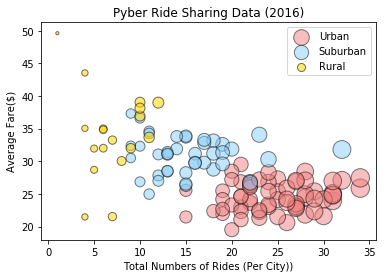

In [9]:
# Create scatter plots for Urban, Suburban and Rural cities
plt.scatter(total_rides_urban_city, avg_fare_urban_city,s=total_drivers_urban_city*10,
            marker ='o', facecolors ="lightcoral", edgecolors='black',alpha = 0.5, label="Urban")

plt.scatter(total_rides_suburban_city, avg_fare_suburban_city,s=total_drivers_suburban_city*10,
            marker ='o', facecolors ="lightskyblue", edgecolors='black',alpha = 0.5, label="Suburban")

plt.scatter(total_rides_rural_city, avg_fare_rural_city,s=total_drivers_rural_city*10,
            marker ='o', facecolors ="gold", edgecolors='black',alpha = 0.55, label="Rural")

# Chart title
plt.title("Pyber Ride Sharing Data (2016)")

# x label
plt.xlabel("Total Numbers of Rides (Per City))")

# y label
plt.ylabel("Average Fare($)")

# legend 
plt.legend(loc='upper right')

# Save an image of the chart and print to screen
plt.savefig("Pyber Ride Sharing.png")
plt.show()

# Total Fares by City Type¶

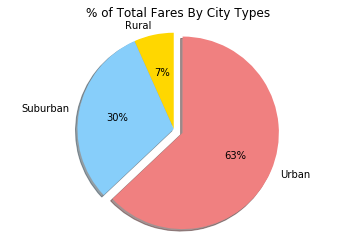

In [44]:
# Calculate Total Fare by City Type
total_fare = pyber_data.groupby(['type'])['fare'].sum()
# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban" ]
# The colors of each section of the pie chart
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Fares By City Types")
plt.pie(total_fare, explode=explode, labels=labels, colors=colors, autopct="%1.f%%",shadow=True, startangle=90)
plt.axis("equal")
plt.savefig("% of Total Fares By City Types.png")
plt.show()

# Total Rides by City Type

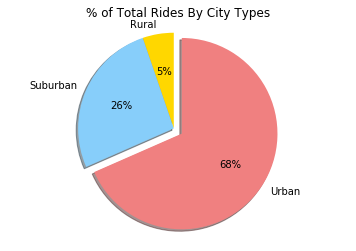

In [45]:
# Calculate Total Fare by City Type
total_rides = pyber_data.groupby(['type'])['ride_id'].count()
# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban" ]
# The colors of each section of the pie chart
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Rides By City Types")
plt.pie(total_rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.savefig("% of Total Rides By City Types.png")
plt.show()

# Total Drivers by City Type

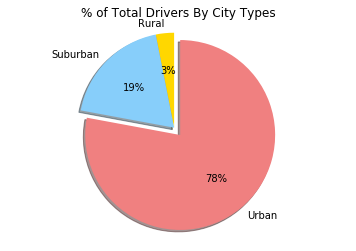

In [46]:
# Calculate Total Drivers by City Type
total_drivers = city_data.groupby(['type'])['driver_count'].sum()
# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban" ]
# The colors of each section of the pie chart
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Drivers By City Types")
plt.pie(total_drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.savefig("% of Total Drivers By City Types.png")
plt.show()